In [2]:
%pip install pd
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_json('whos_hiring.json')

In [5]:
df2 = pd.read_json('who_wants_to_be_hired.json')

In [6]:
df3 = pd.read_csv('interest_rates.csv')

/tmp/ipykernel_91588/996430394.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  jobs_by_quarter = df_filtered.groupby(df_filtered['date'].dt.to_period('Q')).size()
/tmp/ipykernel_91588/996430394.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  looking_for_work_by_quarter = df2_filtered.groupby(df2_filtered['date'].dt.to_period('Q')).size()


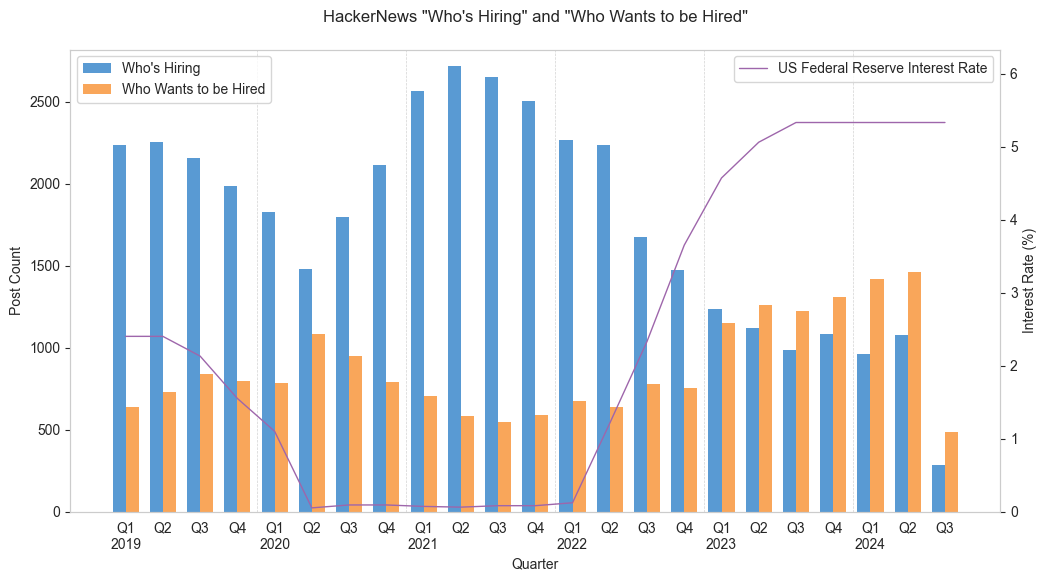

In [13]:
sns.set_style("whitegrid")

# Filter the dataframes to include posts from 2019 until the current month
df_filtered = df[df['date'].dt.year >= 2019]
df2_filtered = df2[df2['date'].dt.year >= 2019]

# Group the dataframes by quarter and count the number of posts in each quarter
jobs_by_quarter = df_filtered.groupby(df_filtered['date'].dt.to_period('Q')).size()
looking_for_work_by_quarter = df2_filtered.groupby(df2_filtered['date'].dt.to_period('Q')).size()

fig, ax = plt.subplots(figsize=(12, 6))
bar_positions = np.arange(len(jobs_by_quarter))
bar_width = 0.35

x_labels = [f"Q{label.quarter}\n{label.year}" if label.quarter == 1 else f"Q{label.quarter}" for label in jobs_by_quarter.index]


ax.bar(bar_positions, jobs_by_quarter.values, width=bar_width, color='#599ad3', edgecolor='none', label='Who\'s Hiring')
ax.bar(bar_positions + bar_width, looking_for_work_by_quarter.values, width=bar_width, color='#f9a65a', edgecolor='none', label='Who Wants to be Hired')

interest_rate_by_quarter = df3.set_index('Quarter')['Interest Rate (%)']
ax2 = ax.twinx()
ax2.plot(bar_positions + bar_width / 2, interest_rate_by_quarter, color='#9e66ab', marker='', linestyle='-', linewidth=1, label='US Federal Reserve Interest Rate')

ax.set_xlabel('Quarter')
ax.set_ylabel('Post Count')
ax2.set_ylabel('Interest Rate (%)')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.set_title('HackerNews "Who\'s Hiring" and "Who Wants to be Hired"', pad=20)
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(x_labels)

for i, label in enumerate(jobs_by_quarter.index):
    if label.quarter == 4:
        ax.axvline(i + bar_width * 2, color='lightgray', linestyle='dashed', linewidth=0.5)

ax.set_ylim(0, max(jobs_by_quarter.values) + 100)
ax2.set_ylim(0, max(interest_rate_by_quarter) + 1)

ax.grid(False)
ax2.grid(False)

plt.show()

ax.set_xlabel('Quarter')
ax.set_ylabel('Post Count')
ax.set_title('HackerNews "Who\'s Hiring" and "Who Wants to be Hired"', pad=20)
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.legend()

for i, label in enumerate(jobs_by_quarter.index):
    if label.quarter == 4:
        ax.axvline(i + bar_width * 2, color='lightgray', linestyle='dashed', linewidth=0.5)

interest_rate_by_quarter = df3.set_index('Quarter')['Interest Rate (%)']
ax2 = ax.twinx()
ax2.plot(bar_positions + bar_width / 2, interest_rate_by_quarter, color='#9e66ab', marker='', linestyle='-', linewidth=1, label='US Federal Reserve Interest Rate')
ax2.set_ylabel('Interest Rate (%)')
ax2.legend(loc='upper right')

ax.set_ylim(0, max(jobs_by_quarter.values) + 100)
ax2.set_ylim(0, max(interest_rate_by_quarter) + 1)

ax.grid(False)
ax2.grid(False)
plt.show()
